<a href="https://colab.research.google.com/github/vidhi-sys/Machine-Learning-Journey/blob/main/SentimentAnalysis02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data=pd.read_csv('sentimentdataset.csv')
data = data[['Text', 'Sentiment']]
display(data.head())

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


In [5]:
data.isnull().sum()

,0
Text,0
Sentiment,0


In [6]:
unique_emotions=data['Sentiment'].unique()
emotion_numbers={}
for i,emotion in enumerate(unique_emotions):
    emotion_numbers[emotion]=i

print(emotion_numbers)
data['Sentiment']=data['Sentiment'].map(emotion_numbers)
data.head()

{' Positive  ': 0, ' Negative  ': 1, ' Neutral   ': 2, ' Anger        ': 3, ' Fear         ': 4, ' Sadness      ': 5, ' Disgust      ': 6, ' Happiness    ': 7, ' Joy          ': 8, ' Love         ': 9, ' Amusement    ': 10, ' Enjoyment    ': 11, ' Admiration   ': 12, ' Affection    ': 13, ' Awe          ': 14, ' Disappointed ': 15, ' Surprise     ': 16, ' Acceptance   ': 17, ' Adoration    ': 18, ' Anticipation ': 19, ' Bitter       ': 20, ' Calmness     ': 21, ' Confusion    ': 22, ' Excitement   ': 23, ' Kind         ': 24, ' Pride        ': 25, ' Shame        ': 26, ' Confusion ': 27, ' Excitement ': 28, ' Shame ': 29, ' Elation       ': 30, ' Euphoria      ': 31, ' Contentment   ': 32, ' Serenity      ': 33, ' Gratitude     ': 34, ' Hope          ': 35, ' Empowerment   ': 36, ' Compassion    ': 37, ' Tenderness    ': 38, ' Arousal       ': 39, ' Enthusiasm    ': 40, ' Fulfillment  ': 41, ' Reverence     ': 42, ' Compassion': 43, ' Fulfillment   ': 44, ' Reverence ': 45, ' Elation  

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,0
1,Traffic was terrible this morning. ...,1
2,Just finished an amazing workout! 💪 ...,0
3,Excited about the upcoming weekend getaway! ...,0
4,Trying out a new recipe for dinner tonight. ...,2


In [7]:
import re
data['Text'] = data['Text'].apply(lambda x: re.sub(r'\d+', '', x))
data['Text'] = data['Text'].apply(lambda x: re.sub(r'[^\w\s#@/:%.,_-]', '', x))
data['Text']=data['Text'].apply(lambda x:x.lower())

display(data.head())

,Text,Sentiment
0,enjoying a beautiful day at the park ...,0
1,traffic was terrible this morning. ...,1
2,just finished an amazing workout,0
3,excited about the upcoming weekend getaway ...,0
4,trying out a new recipe for dinner tonight. ...,2


In [8]:
import string
def remove_punc(Text):
  return Text.translate(str.maketrans('','',string.punctuation))
data['Text']=data['Text'].apply(lambda x:remove_punc(x))

In [9]:
data.head()

,Text,Sentiment
0,enjoying a beautiful day at the park ...,0
1,traffic was terrible this morning ...,1
2,just finished an amazing workout,0
3,excited about the upcoming weekend getaway ...,0
4,trying out a new recipe for dinner tonight ...,2


In [10]:
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Removing StopWords:**https://spacy.io/

In [13]:
english_stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
  word_tokens=text.split()
  cleansed=[]
  for i in word_tokens:
    if i not in english_stopwords:
      cleansed.append(i)
  return' '.join(cleansed)

In [15]:
data['Text']=data['Text'].apply(lambda x:remove_stopwords(x))
display(data.head())

,Text,Sentiment
0,enjoyingbeautifuldaypark,0
1,trafficterriblemorning,1
2,finishedamazingworkout,0
3,excitedupcomingweekendgetaway,0
4,tryingnewrecipedinnertonight,2


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# One-Hot Encoding for Sentiment
encoder = OneHotEncoder()
sentiment_one_hot = encoder.fit_transform(data[['Sentiment']])
print("One-Hot Encoded Sentiment Shape:", sentiment_one_hot.shape)

# Bag of Words (CountVectorizer) for Text
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(data['Text'])
print("Bag of Words Shape:", bag_of_words.shape)

# TF-IDF (TfidfVectorizer) for Text
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(data['Text'])
print("TF-IDF Shape:", tfidf.shape)

One-Hot Encoded Sentiment Shape: (732, 279)
Bag of Words Shape: (732, 706)
TF-IDF Shape: (732, 706)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, sentiment_one_hot, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (585, 706)
X_test shape: (147, 706)
y_train shape: (585, 279)
y_test shape: (147, 279)


In [41]:
from sklearn.svm import LinearSVC

# Train a Linear Support Vector Classifier model
model = LinearSVC(random_state=42)

y_train_dense = y_train.toarray()
y_train_labels = np.argmax(y_train_dense, axis=1)

model.fit(X_train, y_train_labels)

LinearSVC(random_state=42)

In [42]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_test_dense = y_test.toarray()
y_test_labels = np.argmax(y_test_dense, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.10884353741496598


In [49]:
our_text="i feel happy today "
prediction=model.predict(tfidf_vectorizer.transform([our_text]))
print(prediction)

[0]


Sentiment distribution in training data:
0      35
202    34
28     29
277    13
79     11
       ..
168     1
113     1
136     1
14      1
187     1
Name: count, Length: 241, dtype: int64


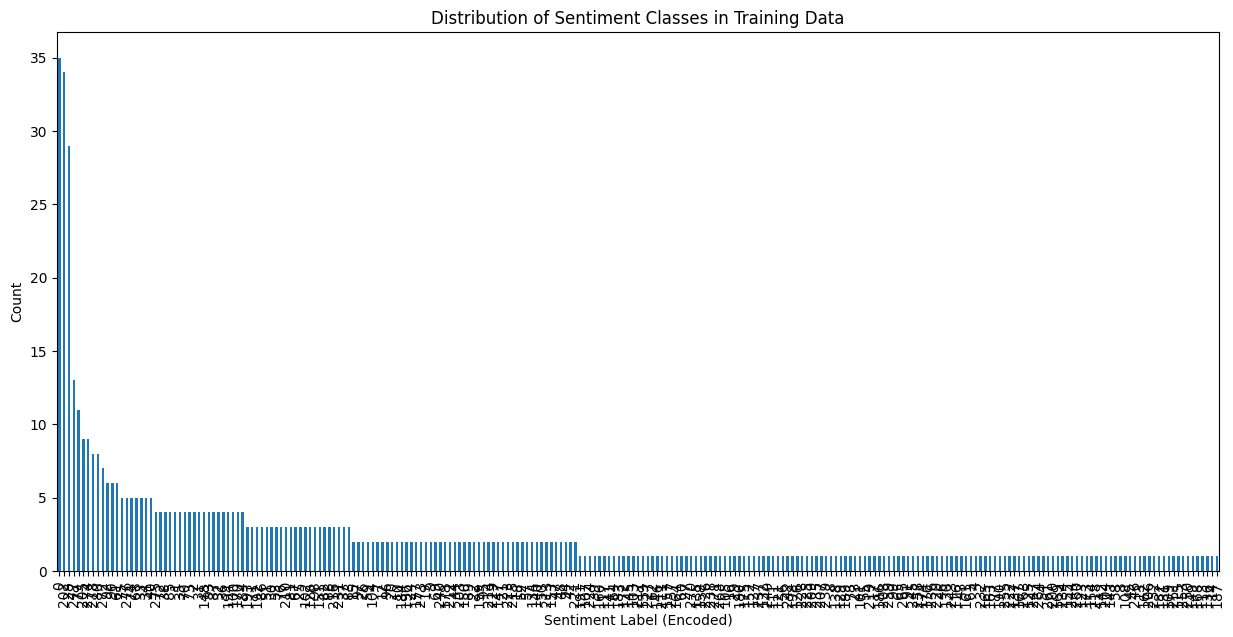

In [51]:

y_train_labels_series = pd.Series(y_train_labels)
sentiment_counts = y_train_labels_series.value_counts()

print("Sentiment distribution in training data:")
print(sentiment_counts)

# visualize the distribution
plt.figure(figsize=(15, 7))
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiment Classes in Training Data')
plt.xlabel('Sentiment Label (Encoded)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()